In [1]:
import pandas
import configparser
import psycopg2

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [11]:
conn = psycopg2.connect(host = host,
                       user = user,
                        password = pwd,
                        dbname = db
                       )
cur = conn.cursor()

In [12]:
cur=conn.cursor()

In [13]:
# replace the schema and table name to your schema and table name
table_sql = """
            CREATE TABLE IF NOT EXISTS gp24.house
            (

                price integer,
                bed integer,
                bath integer,
                area integer,
                address VARCHAR(200),
                PRIMARY KEY(address)
            );

            """

In [14]:
#conn.rollback()
#table_sql="drop table if exists demo.house"

In [15]:
cur.execute(table_sql)
conn.commit()

In [67]:
url="https://www.trulia.com/VA/Lorton/22079/"

In [68]:
import urllib.request
response = urllib.request.urlopen(url)
html_data= response.read()
# print(html_data.decode('utf-8'))

In [69]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html_data,'html.parser')
# print (soup)

In [70]:
for li_class in soup.find_all('li', class_ = 'Grid__CellBox-sc-144isrp-0 SearchResultsList__WideCell-b7y9ki-2 jiZmPM'):
    try:
        for price_div in li_class.find_all('div',{'data-testid':'property-price'}):
            price =int(price_div.text.replace('$','').replace(",",""))
        for bed_div in li_class.find_all('div', {'data-testid':'property-beds'}):
            bed= int(bed_div.text.replace('bd','').replace(",",""))
        for bath_div in li_class.find_all('div',{'data-testid':'property-baths'}):
            bath =int(bath_div.text.replace('ba','').replace(",",""))
        for area_div in li_class.find_all('div',{'data-testid':'property-floorSpace'}):
            area=int(area_div.text.split('sqft')[0].replace(",",""))
        for address_div in li_class.find_all('div',{'data-testid':'property-address'}):
            address =address_div.text

        try:
            sql_insert = """
                        insert into gp24.house(price,bed,bath,area,address)
                        values('{}','{}','{}','{}','{}')            
                        """.format(price,bed,bath,area,address)

            cur.execute(sql_insert)
            conn.commit()
        except:
            conn.rollback()
    except:
        pass

In [75]:
df = pandas.read_sql_query('select * from gp24.house ', conn)
df[:]

,price,bed,bath,area,address
0,429000,4,3,2392,"1038 James Pl, Harrisonburg, VA 22801"
1,334900,4,3,1584,"135 Port Republic Rd, Harrisonburg, VA 22801"
2,199900,4,1,1285,"786 Foley Rd, Harrisonburg, VA 22801"
3,329080,3,2,1296,"2095 Tailor Dr, Harrisonburg, VA 22801"
4,372980,3,2,1366,"2070 Tailor Dr, Harrisonburg, VA 22801"
...,...,...,...,...,...
74,485000,3,2,1320,"7522 Bay View Dr, Lorton, VA 22079"
75,650000,3,2,1320,"9508 Elk Horn Rd, Lorton, VA 22079"
76,434900,3,3,1280,"7448 Pohick Rd, Lorton, VA 22079"
77,434900,3,4,1220,"9193 Sheffield Hunt Ct, Lorton, VA 22079"


In [76]:
df.describe()

,price,bed,bath,area
count,7.900000e+01,79.000000,79.000000,79.000000
mean,4.438914e+05,3.316456,2.848101,2038.797468
std,2.255717e+05,1.056655,1.241263,1194.320581
min,1.000000e+05,1.000000,1.000000,596.000000
25%,3.099500e+05,3.000000,2.000000,1320.000000
50%,3.949750e+05,3.000000,3.000000,1601.000000
75%,5.549000e+05,4.000000,3.500000,2291.000000
max,1.250000e+06,7.000000,7.000000,7440.000000


<AxesSubplot:>

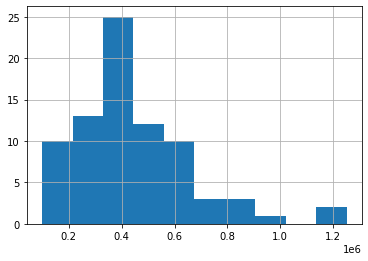

In [77]:
df['price'].hist()

<AxesSubplot:xlabel='bed', ylabel='bath'>

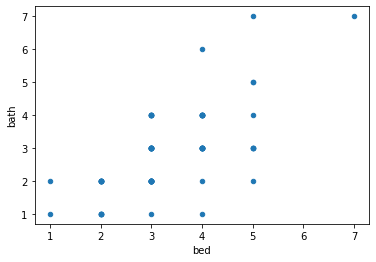

In [78]:
df.plot.scatter(x='bed',y='bath')